In [1]:
# Import all libraries and dependencies

import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
#pip install openpyxl

In [3]:
# load the data files
world_cup = pd.read_csv('fixtures_t20_wc.csv')



In [4]:
#summary of each match dataset for year 2019-2022
results = pd.read_csv('Book1.csv')

In [5]:
results.head()

,match_id,team1,team2,gender,season,date,event,match_number,venue,city,...,toss_decision,player_of_match,umpire,umpire.1,reserve_umpire,tv_umpire,match_referee,result,winner_by_runs,winner_by_wicket
0,1122286,India,South Africa,male,2017/18,43152.0,India tour of South Africa,2,SuperSport Park,Centurion,...,field,H Klaasen,A Paleker,BP Jele,S George,AT Holdstock,AJ Pycroft,South Africa,0,6
1,1145982,Afghanistan,Bangladesh,male,2018,43254.0,Afghanistan tour of India,1,"Rajiv Gandhi International Cricket Stadium, De...",Dehra Dun,...,field,Rashid Khan,Ahmed Shah Pakteen,Bismillah Shinwari,Mahmood Kharoti,Izatullah Safi,AJ Pycroft,Afghanistan,45,0
2,1183524,Australia,Sri Lanka,male,2019/20,43765.0,Sri Lanka tour of Australia,1,Adelaide Oval,Adelaide,...,field,DA Warner,P Wilson,GA Abood,PJ Gillespie,SAJ Craig,J Srinath,Australia,134,0
3,1183525,Australia,Sri Lanka,male,2019/20,43768.0,Sri Lanka tour of Australia,2,"Brisbane Cricket Ground, Woolloongabba",Brisbane,...,bat,DA Warner,P Wilson,GA Abood,PJ Gillespie,SAJ Craig,J Srinath,Australia,0,9
4,1183526,Australia,Sri Lanka,male,2019/20,43770.0,Sri Lanka tour of Australia,3,Melbourne Cricket Ground,Melbourne,...,field,DA Warner,P Wilson,SAJ Craig,PJ Gillespie,GA Abood,J Srinath,Australia,0,7


In [6]:
results = results[['team1','team2','result']]

In [7]:
# Display the head of the data fil

results.head()

,team1,team2,result
0,India,South Africa,South Africa
1,Afghanistan,Bangladesh,Afghanistan
2,Australia,Sri Lanka,Australia
3,Australia,Sri Lanka,Australia
4,Australia,Sri Lanka,Australia


In [8]:
results['team1'].unique()

array(['India', 'Afghanistan', 'Australia', 'South Africa', 'New Zealand',
       'Netherlands', 'West Indies', 'Sri Lanka', 'Bangladesh', 'Ireland',
       'Oman', 'England', 'Pakistan', 'Scotland', 'Hong Kong',
       'United Arab Emirates', 'Zimbabwe', 'Namibia', 'Nepal'],
      dtype=object)

In [9]:
results['team2'].unique()

array(['South Africa', 'Bangladesh', 'Sri Lanka', 'Pakistan', 'England',
       'Australia', 'West Indies', 'India', 'Zimbabwe',
       'United Arab Emirates', 'New Zealand', 'Afghanistan',
       'Netherlands', 'Ireland', 'Singapore', 'Scotland',
       'Papua New Guinea', 'Oman', 'Namibia', 'United States of America',
       'Nepal'], dtype=object)

In [10]:
teams = [
    'Australia', 'South Africa', 'India', 'New Zealand',
       'West Indies',  'Sri Lanka',
       'Afghanistan', 'Bangladesh', 'England',
       'Pakistan', 
]

In [11]:
results = results[results['team1'].isin(teams)]
results = results[results['team2'].isin(teams)]

In [12]:
# Display the head of the data file

world_cup.head()

,Team_1,Team_2,Group,"Day, Date",Venue,Result
0,Australia,New Zealand,Group A,"Saturday 22nd October, 2022","Sydney Cricket Ground, Sydney",NaN
1,England,Afghanistan,Group A,"Saturday 22nd October, 2022","Perth Stadium, Perth",NaN
2,Sri Lanka,Sri Lanka,Group A,"Sunday 23rd October, 2022","Bellerive Oval, Hobart",NaN
3,India,Pakistan,Group B,"Sunday 23rd October, 2022","Melbourne Cricket Ground, Melbourne",NaN
4,Bangladesh,Bangladesh,Group B,"Monday 24th October, 2022","Bellerive Oval, Hobart",NaN


In [13]:
#Combine the teams participating in the world cup

worldcup_teams = ['England', ' South Africa', '', 'West Indies', 
            'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 
            'Australia', 'Bangladesh', 'India']
df_teams_1 = results[results['team1'].isin(worldcup_teams)]
df_teams_2 = results[results['team2'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_1, df_teams_2))
df_teams.drop_duplicates()
df_teams.count()

team1     330
team2     330
result    330
dtype: int64

In [14]:
# Display the results of the newly created dataframe

df_teams.head()

,team1,team2,result
0,India,South Africa,South Africa
1,Afghanistan,Bangladesh,Afghanistan
2,Australia,Sri Lanka,Australia
3,Australia,Sri Lanka,Australia
4,Australia,Sri Lanka,Australia


In [15]:
# Building the model

# The prediction label: The winning_team column will show "1" if Team 1 has won, and "2" if Team 2 has won.

df_teams = df_teams.reset_index(drop=True)
df_teams.loc[df_teams.result == df_teams.team1,'winning_team']=1
df_teams.loc[df_teams.result == df_teams.team2, 'winning_team']=2
df_teams = df_teams.drop(['winning_team'], axis=1)

df_teams.head()

,team1,team2,result
0,India,South Africa,South Africa
1,Afghanistan,Bangladesh,Afghanistan
2,Australia,Sri Lanka,Australia
3,Australia,Sri Lanka,Australia
4,Australia,Sri Lanka,Australia


In [16]:
df_teams.rename(columns={'team1':'Team_1', 'team2':'Team_2', 'result':'Winner'}, inplace=True)

In [17]:
# Convert team-1 and team-2 from categorical variables to continous inputs 

final = pd.get_dummies(df_teams, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# Separate X and y sets

X = final.drop(['Winner'], axis=1)
y = final["Winner"]


# Divide the data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
# Display the first 5 rows of the data
final.head()

,Winner,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_England,Team_1_India,Team_1_New Zealand,Team_1_Pakistan,Team_1_South Africa,Team_1_Sri Lanka,...,Team_2_Afghanistan,Team_2_Australia,Team_2_Bangladesh,Team_2_England,Team_2_India,Team_2_New Zealand,Team_2_Pakistan,Team_2_South Africa,Team_2_Sri Lanka,Team_2_West Indies
0,South Africa,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Afghanistan,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Australia,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Australia,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Australia,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
# Convert team-1 and team-2 from categorical variables to continous inputs 

fl = pd.get_dummies(df_teams,  columns=['Team_1', 'Team_2'])



In [20]:
fl

,Winner,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_England,Team_1_India,Team_1_New Zealand,Team_1_Pakistan,Team_1_South Africa,Team_1_Sri Lanka,...,Team_2_Afghanistan,Team_2_Australia,Team_2_Bangladesh,Team_2_England,Team_2_India,Team_2_New Zealand,Team_2_Pakistan,Team_2_South Africa,Team_2_Sri Lanka,Team_2_West Indies
0,South Africa,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Afghanistan,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Australia,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Australia,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Australia,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Pakistan,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
326,Pakistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
327,Australia,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
328,Bangladesh,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [21]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.758
Test set accuracy:  0.606


In [22]:
#comprehensive report on the classification with classification_report():
print("classification_report LogisticRegression \n")
print(classification_report(y_test, logreg.predict(X_test)))

classification_report LogisticRegression 

              precision    recall  f1-score   support

 Afghanistan       0.50      1.00      0.67         1
   Australia       0.58      0.61      0.59        18
  Bangladesh       0.00      0.00      0.00         9
     England       0.56      0.69      0.62        13
       India       0.77      1.00      0.87        17
 New Zealand       0.59      0.67      0.62        15
    Pakistan       0.75      0.86      0.80         7
South Africa       1.00      0.17      0.29         6
   Sri Lanka       1.00      0.40      0.57         5
 West Indies       0.25      0.60      0.35         5
   no result       0.00      0.00      0.00         1
         tie       0.00      0.00      0.00         2

    accuracy                           0.61        99
   macro avg       0.50      0.50      0.45        99
weighted avg       0.58      0.61      0.56        99



C:\Users\Parth Shah 7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Parth Shah 7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Parth Shah 7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [23]:
confusion_matrix(y_test, logreg.predict(X_test))

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  1,  0,  3,  0,  0,  0,  3,  0,  0],
       [ 0,  5,  0,  0,  0,  3,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  9,  2,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  1, 10,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  6,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  1,  0,  1,  1,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  2,  1,  0,  0],
       [ 1,  0,  0,  1,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

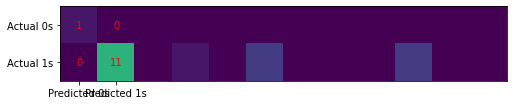

In [24]:
cm = confusion_matrix(y_test, logreg.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
reg = RandomForestClassifier()
reg.fit(X_train, y_train)
score = reg.score(X_train, y_train)
score2 = reg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.771
Test set accuracy:  0.586


In [26]:
#comprehensive report on the classification with classification_report():
print("classification_report RandomForestClassifier \n")
print(classification_report(y_test, reg.predict(X_test)))

classification_report RandomForestClassifier 

              precision    recall  f1-score   support

 Afghanistan       0.50      1.00      0.67         1
   Australia       0.62      0.72      0.67        18
  Bangladesh       0.00      0.00      0.00         9
     England       0.57      0.62      0.59        13
       India       0.71      0.71      0.71        17
 New Zealand       0.67      0.67      0.67        15
    Pakistan       0.86      0.86      0.86         7
South Africa       1.00      0.33      0.50         6
   Sri Lanka       0.29      0.40      0.33         5
 West Indies       0.31      0.80      0.44         5
   no result       0.00      0.00      0.00         1
         tie       0.00      0.00      0.00         2

    accuracy                           0.59        99
   macro avg       0.46      0.51      0.45        99
weighted avg       0.57      0.59      0.56        99



C:\Users\Parth Shah 7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Parth Shah 7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Parth Shah 7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [27]:
from sklearn.tree import DecisionTreeClassifier
dd = DecisionTreeClassifier()
dd.fit(X_train, y_train)
score = dd.score(X_train, y_train)
score2 = dd.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.771
Test set accuracy:  0.596


In [28]:
#comprehensive report on the classification with classification_report():
print("classification_report DecisionTreeClassifier \n")
print(classification_report(y_test, dd.predict(X_test)))

classification_report DecisionTreeClassifier 

              precision    recall  f1-score   support

 Afghanistan       0.50      1.00      0.67         1
   Australia       0.62      0.72      0.67        18
  Bangladesh       0.00      0.00      0.00         9
     England       0.62      0.77      0.69        13
       India       0.67      0.59      0.62        17
 New Zealand       0.71      0.80      0.75        15
    Pakistan       0.75      0.86      0.80         7
South Africa       1.00      0.17      0.29         6
   Sri Lanka       0.29      0.40      0.33         5
 West Indies       0.44      0.80      0.57         5
   no result       0.00      0.00      0.00         1
         tie       0.00      0.00      0.00         2

    accuracy                           0.60        99
   macro avg       0.47      0.51      0.45        99
weighted avg       0.57      0.60      0.56        99



C:\Users\Parth Shah 7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Parth Shah 7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Parth Shah 7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [29]:
from sklearn.neighbors import KNeighborsClassifier
kk = KNeighborsClassifier()
kk.fit(X_train, y_train)
score = kk.score(X_train, y_train)
score2 = kk.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.727
Test set accuracy:  0.566


In [30]:
#comprehensive report on the classification with classification_report():
print("classification_report KNeighborsClassifier \n")
print(classification_report(y_test, kk.predict(X_test)))

classification_report KNeighborsClassifier 

              precision    recall  f1-score   support

 Afghanistan       0.50      1.00      0.67         1
   Australia       0.81      0.72      0.76        18
  Bangladesh       1.00      0.33      0.50         9
     England       0.62      0.77      0.69        13
       India       0.46      0.71      0.56        17
 New Zealand       0.57      0.53      0.55        15
    Pakistan       0.56      0.71      0.63         7
South Africa       0.00      0.00      0.00         6
   Sri Lanka       0.29      0.40      0.33         5
 West Indies       0.40      0.40      0.40         5
   no result       0.00      0.00      0.00         1
         tie       0.00      0.00      0.00         2

    accuracy                           0.57        99
   macro avg       0.43      0.46      0.42        99
weighted avg       0.57      0.57      0.54        99



C:\Users\Parth Shah 7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Parth Shah 7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Parth Shah 7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [31]:
# Adding the ICC rankings
# The team which is positioned higher on the ICC Ranking will be considered "favourite" for the match
# and will be positioned under the "Team_1" column

# Loading new datasets

ranking = pd.read_csv('icc_rankings.csv') 
fixtures = pd.read_csv('fixtures_t20_wc.csv')

# List for storing the group stage games

pred_set = []

In [32]:
ranking

,Position,Team,Points
0,1,India,270
1,2,England,265
2,3,Pakistan,261
3,4,South Africa,253
4,5,Australia,251
5,6,New Zealand,250
6,7,West Indies,240
7,8,Bangladesh,233
8,9,Sri Lanka,230
9,10,Afghanistan,226


In [33]:
# Create new columns with ranking position of each team

fixtures.insert(1, 'first_position', fixtures['Team_1'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Team_2'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so slice the dataset and display the last 5 rows

fixtures = fixtures.iloc[:30, :]
fixtures.tail()

,Team_1,first_position,second_position,Team_2,Group,"Day, Date",Venue,Result
25,Australia,5.0,10.0,Afghanistan,Group A,"Friday, 4th November, 2022","Adelaide Oval, Adelaide",NaN
26,England,2.0,9.0,Sri Lanka,Group A,"Saturday, 5th November, 2022","Sydney Cricket Ground, Sydney",NaN
27,South Africa,4.0,4.0,South Africa,Group B,"Sunday, 6th November, 2022","Adelaide Oval, Adelaide",NaN
28,Pakistan,3.0,8.0,Bangladesh,Group B,"Sunday, 6th November, 2022","Adelaide Oval, Adelaide",NaN
29,India,1.0,7.0,West Indies,Group B,"Sunday, 6th November, 2022","Melbourne Cricket Ground, Melbourne",NaN


In [34]:
fixtures

,Team_1,first_position,second_position,Team_2,Group,"Day, Date",Venue,Result
0,Australia,5.0,6.0,New Zealand,Group A,"Saturday 22nd October, 2022","Sydney Cricket Ground, Sydney",NaN
1,England,2.0,10.0,Afghanistan,Group A,"Saturday 22nd October, 2022","Perth Stadium, Perth",NaN
2,Sri Lanka,9.0,9.0,Sri Lanka,Group A,"Sunday 23rd October, 2022","Bellerive Oval, Hobart",NaN
3,India,1.0,3.0,Pakistan,Group B,"Sunday 23rd October, 2022","Melbourne Cricket Ground, Melbourne",NaN
4,Bangladesh,8.0,8.0,Bangladesh,Group B,"Monday 24th October, 2022","Bellerive Oval, Hobart",NaN
5,South Africa,4.0,7.0,West Indies,Group B,"Monday 24th October, 2022","Bellerive Oval, Hobart",NaN
6,Australia,5.0,9.0,Sri Lanka,Group A,"Tuesday 25th October, 2022","Perth Stadium, Perth",NaN
7,England,2.0,2.0,England,Group A,"Wednesday, 26th October, 2022","Melbourne Cricket Ground, Melbourne",NaN
8,Afghanistan,10.0,6.0,New Zealand,Group A,"Wednesday, 26th October, 2022","Melbourne Cricket Ground, Melbourne",NaN
9,South Africa,4.0,8.0,Bangladesh,Group B,"Thursday, 27th October, 2022","Sydney Cricket Ground, Sydney",NaN


In [35]:
# Loop to add teams to new prediction dataset based on the ranking position of each team

for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
    else:
        pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head()

,Team_1,Team_2,winning_team
0,Australia,New Zealand,None
1,England,Afghanistan,None
2,Sri Lanka,Sri Lanka,None
3,India,Pakistan,None
4,Bangladesh,Bangladesh,None


In [36]:
# Get dummy variables and drop winning_team column

pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# Add missing columns compared to the model's training dataset

missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]


#pred_set = pred_set.drop(['Winner'], axis=1)
pred_set.head()

,Winner,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_England,Team_1_India,Team_1_New Zealand,Team_1_Pakistan,Team_1_South Africa,Team_1_Sri Lanka,...,Team_2_Afghanistan,Team_2_Australia,Team_2_Bangladesh,Team_2_England,Team_2_India,Team_2_New Zealand,Team_2_Pakistan,Team_2_South Africa,Team_2_Sri Lanka,Team_2_West Indies
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [37]:
pred_set = pred_set.drop(['Winner'], axis=1)
pred_set.head()

,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_England,Team_1_India,Team_1_New Zealand,Team_1_Pakistan,Team_1_South Africa,Team_1_Sri Lanka,Team_1_West Indies,Team_2_Afghanistan,Team_2_Australia,Team_2_Bangladesh,Team_2_England,Team_2_India,Team_2_New Zealand,Team_2_Pakistan,Team_2_South Africa,Team_2_Sri Lanka,Team_2_West Indies
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [38]:
# Get the results of league matches 

predictions = logreg.predict(pred_set)
print("LEAGUE STAGE PREDICTION : ICC WT20 2022 \n")
for i in range(fixtures.shape[0]):   
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 1:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    
    else:
        print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")

LEAGUE STAGE PREDICTION : ICC WT20 2022 

New Zealand and Australia
Winner: Australia

Afghanistan and England
Winner: England

Sri Lanka and Sri Lanka
Winner: Sri Lanka

Pakistan and India
Winner: India

Bangladesh and Bangladesh
Winner: Bangladesh

West Indies and South Africa
Winner: South Africa

Sri Lanka and Australia
Winner: Australia

England and England
Winner: England

Afghanistan and New Zealand
Winner: New Zealand

Bangladesh and South Africa
Winner: South Africa

India and India
Winner: India

West Indies and Pakistan
Winner: Pakistan

Afghanistan and Afghanistan
Winner: Afghanistan

Australia and England
Winner: England

Sri Lanka and New Zealand
Winner: New Zealand

Bangladesh and West Indies
Winner: West Indies

Pakistan and Pakistan
Winner: Pakistan

South Africa and India
Winner: India

Australia and Australia
Winner: Australia

Afghanistan and Sri Lanka
Winner: Sri Lanka

New Zealand and England
Winner: England

West Indies and West Indies
Winner: West Indies

Bangla

In [39]:
def semi_finals(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to ICC ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better then this team will be the 'Team_1' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1
        
        # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['Winner'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")

In [40]:
# List of tuples before

semi = [('Australia', 'India'),
            ('England', 'Pakistan')]

In [41]:
# Get the results of league matches 

print("SEMI FINAL PREDICTION : ICC WT20 2022 \n")

semi_finals(semi, ranking, final, logreg)

SEMI FINAL PREDICTION : ICC WT20 2022 

Australia and India
Winner: India

Pakistan and England
Winner: England



In [42]:
fixtures.shape[0]

30

In [43]:
def last_match(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to ICC ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better then this team will be the 'Team_1' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1
        
        # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['Winner'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")

In [44]:
# Finals
finals = [('India', 'England')]

In [45]:
print("FINAL PREDICTION : ICC WT20 2022 \n")
last_match(finals, ranking, final, logreg)

FINAL PREDICTION : ICC WT20 2022 

England and India
Winner: India

